***

## Upper Confidence Bound

***

### Data Comprehension

Suppose here, we've a list of differents retailers with there sales score. We want to choose retailers that make good bid and this is done according to their scores. This kind of problem is listed as K-armed bandit problem. And for solving it some of the algorithms which belong to the Reinforcement Learning Class. This class is known to be used to solve problem where exists the needs to maximise our reward from differents choices. <br>
A retailer with a score above 5 is considerated as a good dealer.<br>
In contrast, a retailer with score lesser than 5 is considerated as a bad dealer.<br>
So here, our job is to analyse data and find which retailers are the good dealer. Therefore the UCB algorithm seems to be good for doing this work. <br> 
There is also another algorithm called "Thompson Sampling Algorithm" which is suitable too for this job. 

### Data Preprocessing

#### Importing libraries and datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

In [25]:
df = pd.read_csv("C:/Users/HP Elitebook/OneDrive/Bureau/data.csv")
df.head()

,Retailer01,Retailer02,Retailer03,Retailer04,Retailer05,Retailer06,Retailer07,Retailer08
0,3,6,1,6,7,6,1,4
1,6,5,6,10,7,5,1,1
2,3,4,8,4,5,7,4,1
3,8,10,5,4,5,9,6,4
4,1,4,9,9,9,6,7,4


#### Checking unique values

In [26]:
np.unique(df)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

#### Binary encoding

In [27]:
df = (df > 5).astype(int)
np.unique(df)

array([0, 1])

### UCB implementation

In [38]:
N = len(df)
d = 8
retailers = []
numbers_of_choices = [0] * d
sums_of_rewards = [0] * d
total_rewards =0
for n in range(0, N):
    retailer = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_choices[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_choices[i]
            delta_i = math.sqrt(3/2 * np.log(n + 1) / numbers_of_choices[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e1000
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            retailer = i
    retailers.append(retailer)
    numbers_of_choices[retailer] = numbers_of_choices[retailer] + 1
    sums_of_rewards[retailer] = sums_of_rewards[retailer] + df.values[n, retailer]
    total_rewards = total_rewards + df.values[n, retailer]

### Visualization

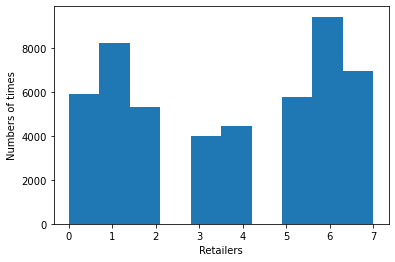

In [48]:
plt.hist(retailers, histtype = 'barstacked')
plt.xlabel('Retailers')
plt.ylabel('Numbers of times')
plt.show()

In [45]:
plt.hist?